<br><p style="font-family: Arial; font-size:2.25em;color:purple; font-style:bold">
Matplotlib: Exploring Data Visualization</p><br><br>

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
In this notebook, we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

In [1]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

### HANDS ON 1: Solution


In [ ]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask2 = data['Year'].isin([hist_year])

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])
mask3 = data['CountryCode'].isin(['USA','CEB','EAP','FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN'])

# apply our mask
co2_2011 = data[mask1 & mask2 & mask3].sort_values(by='Value', ascending=False)
co2_2011.head()


In [ ]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a tuple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(17, 1), xycoords='data',
            xytext=(15,3), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

<p style="font-family: Arial; font-size:2.0em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 2</p>

### Relationship between GPD and CO2 Emissions in USA

In [53]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)


# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [54]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [55]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


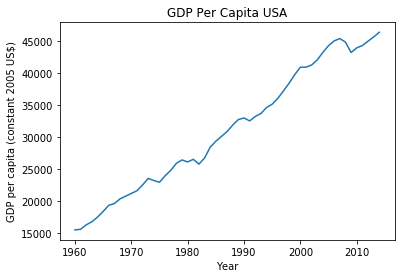

In [56]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')

plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

So although we've seen a decline in the CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita

### ScatterPlot for comparing GDP against CO2 emissions (per capita)

First, we'll need to make sure we're looking at the same time frames

In [58]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [59]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


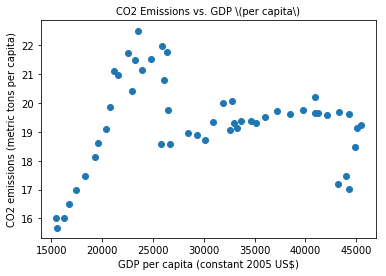

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

#axis.yaxis.grid(True)
#axis.xaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

This doesn't look like a strong relationship.  We can test this by looking at correlation.

In [61]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

A correlation of 0.07 is pretty weak, but you'll learn more about correlation in the next course.

### HANDS ON 2: 

You could continue to explore this to see if other countries have a closer relationship between CO2 emissions and GDP.  Perhaps it is stronger for developing countries?

In [ ]:
# TODO
















### HANDS ON 2: Solution

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# select GDP Per capita emissions for the United States
gdp_indicator = 'GDP per capita \(constant 2005'
cO2_indicator = 'CO2 emissions \(metric'

country_type = 'developing'
filt = data['CountryName'].str.contains('developing') & data['CountryCode'].str.contains('EAP')
filtered_data = data[filt]

mask1 = data['IndicatorName'].str.contains(gdp_indicator) 
mask2 = data['IndicatorName'].str.contains(cO2_indicator)

gdp_stage = filtered_data[mask1]
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]

stage = filtered_data[mask2]

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel('GDP per capita (constant 2005 US$)',fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;